<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Kernel_SVM_Decision_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from sklearn.svm import SVC

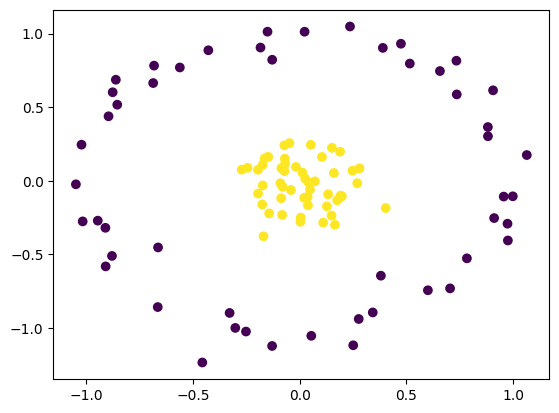

In [2]:
# generate the circles data

X,y = make_circles(n_samples=100,
                   random_state=76,
                   noise=0.1,
                   factor=0.2)

# plot the data
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

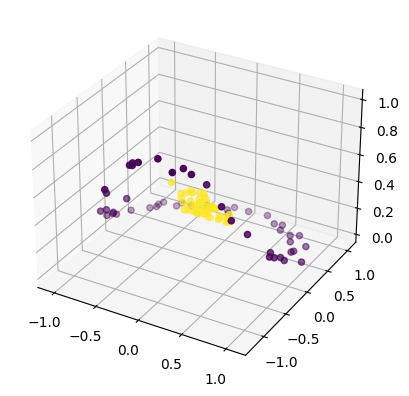

In [3]:
# generate a custom rbf kernel
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel_matrix(data, gamma=1.0):
    n = len(data)
    kernel_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            kernel_matrix[i, j] = np.exp(-gamma * (np.linalg.norm(data[i] - data[j])) ** 2)
    return kernel_matrix


# Define the RBF gamma parameter for the kernel
gamma = 1.0

# Compute the RBF kernel matrix for the data
kernel_matrix = rbf_kernel_matrix(X, gamma)

# Plot the transformed data on a scatter plot
ax = plt.subplot(projection='3d')
ax.scatter3D(xs=X[:, 0], ys=X[:, 1], zs=kernel_matrix[:, 0], c=y)

# Show the plot
plt.show()



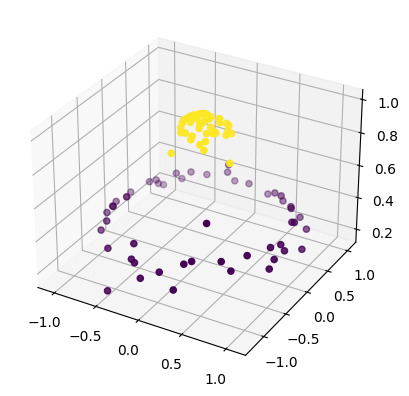

In [4]:
# custom rbf kernels

def plot_rbf(X,y):
    transform = np.exp(-(X**2).sum(axis=1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],transform,c=y)
    return ax

# plot the graph with rbf kernel
plot_rbf(X,y)
plt.show()

In [5]:
# instantiate objects

svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly',degree=2)

In [6]:
# define a decision boundary function

def make_decisions(X_data,y_data,clf):
    x = np.arange(X[:,0].min()-1,X[:,0].max()+1,0.01)
    y = np.arange(X[:,1].min()-1,X[:,1].max()+1,0.01)

    XX,YY = np.meshgrid(x,y)

    arr  = np.array([XX.ravel(),YY.ravel()]).T

    # do predictions
    z = clf.predict(arr).reshape(XX.shape)

    # plot the boundaries
    #plot the scatter plot
    plt.scatter(X_data[:,0],X_data[:,1],c=y_data)

    # plot the contour plot
    plt.contourf(XX,YY,z,alpha=0.3)
    plt.show()

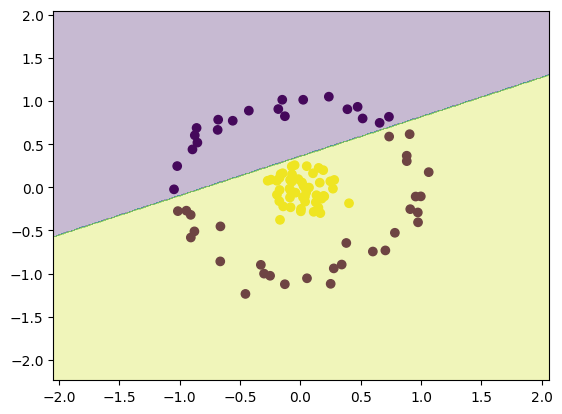

In [7]:
# use linear kernel for classification

# fit the model on data

svm_linear.fit(X,y)

# make decision boundary
make_decisions(X,y,svm_linear)

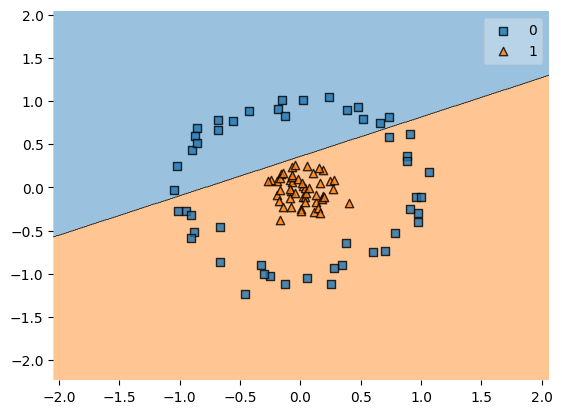

In [8]:
# plot using mlxtend

plot_decision_regions(X,y,svm_linear)
plt.show()

In [9]:
# get the accuracy score for linear kernel

from sklearn.metrics import accuracy_score

score = accuracy_score(y,svm_linear.predict(X))
score

0.7

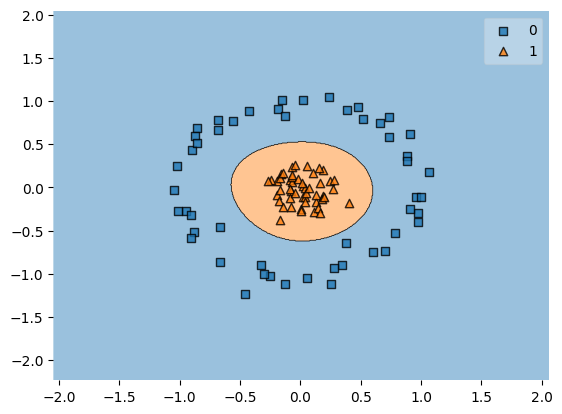

In [10]:
# fit the rbf kernel

svm_rbf.fit(X,y)

# plot the decision boundaries
plot_decision_regions(X,y,svm_rbf)
plt.show()

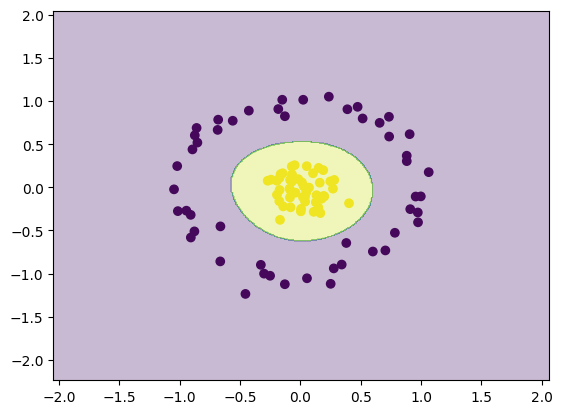

In [11]:
# plot using custom function

make_decisions(X,y,svm_rbf)

In [12]:
#accuracy score for rbf kernel

score = accuracy_score(y,svm_rbf.predict(X))
score

1.0

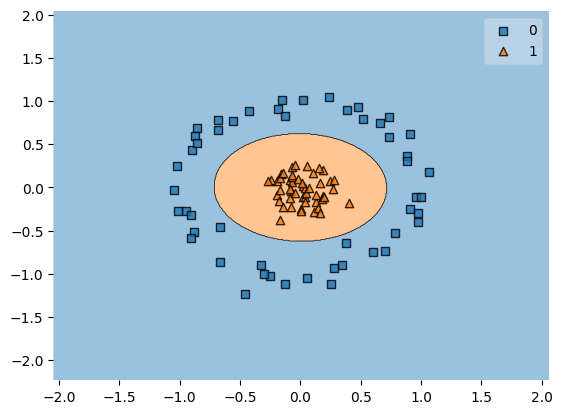

In [13]:
# fit the plynomial kernel

svm_poly.fit(X,y)

# plot the decision boundaries
plot_decision_regions(X,y,svm_poly)
plt.show()

In [14]:
#accuracy score for polynomial kernel
score = accuracy_score(y,svm_poly.predict(X))
score


1.0

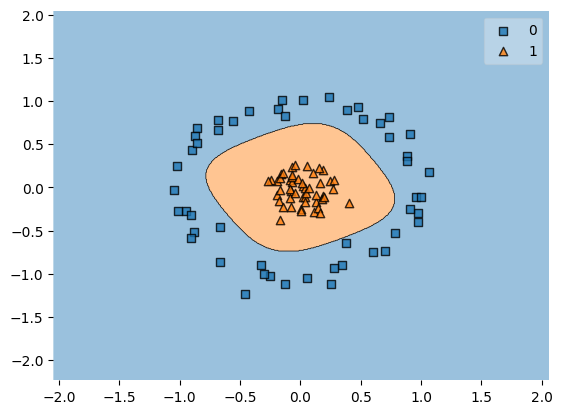

In [15]:
# make a polynomial kernel of degree 4
svm_poly = SVC(kernel='poly',degree=4)

# fit the plynomial kernel

svm_poly.fit(X,y)

# plot the decision boundaries
plot_decision_regions(X,y,svm_poly)
plt.show()

In [16]:
#accuracy score for polynomial kernel
score = accuracy_score(y,svm_poly.predict(X))
score

1.0